In [15]:
import os
os.environ['CUDA_VISIBLE_DEVICE'] = ''
import argparse

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

%load_ext autoreload
%autoreload 2

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data import IAMLines

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!ulimit -n 65000

'ulimit'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [7]:
dataset = IAMLines(argparse.Namespace(augment_data="false"))
dataset.prepare_data()
dataset.setup()
print(dataset)

c:\Users\user\pytorch\lib\site-packages\pytorch_lightning\core\datamodule.py:175: LightningDeprecationWarning: DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation("DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.")
c:\Users\user\pytorch\lib\site-packages\pytorch_lightning\core\datamodule.py:170: LightningDeprecationWarning: DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation("DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.")


IAM Lines Dataset
Num classes: 83
Dims: (1, 56, 2048)
Output dims: (89, 1)
Train/val/test sizes: 9116, 2279, 1958
Train Batch x stats: (torch.Size([128, 1, 56, 2048]), torch.float32, tensor(0.), tensor(0.0159), tensor(0.0680), tensor(0.9294))
Train Batch y stats: (torch.Size([128, 89]), torch.int64, tensor(1), tensor(82))
Test Batch x stats: (torch.Size([128, 1, 56, 2048]), torch.float32, tensor(0.), tensor(0.0137), tensor(0.0591), tensor(0.9294))
Test Batch y stats: (torch.Size([128, 89]), torch.int64, tensor(1), tensor(81))



In [9]:
def convert_y_label_to_string(y, datset=dataset):
    return ''.join([dataset.mapping[i] for i in y if i != 3]) # 3 == 패딩 토큰

convert_y_label_to_string(dataset.data_train[0][1])

'<S>doubt that a pile of badly stacked,<E>'

<Figure size 1440x1440 with 0 Axes>

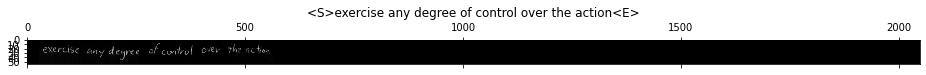

<Figure size 1440x1440 with 0 Axes>

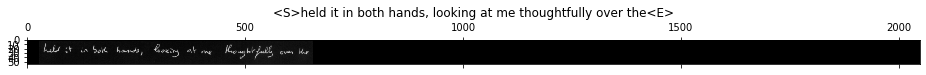

<Figure size 1440x1440 with 0 Axes>

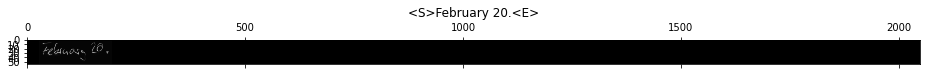

<Figure size 1440x1440 with 0 Axes>

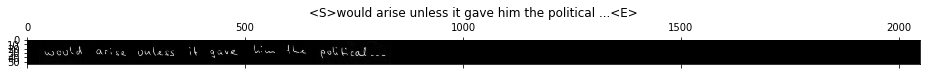

<Figure size 1440x1440 with 0 Axes>

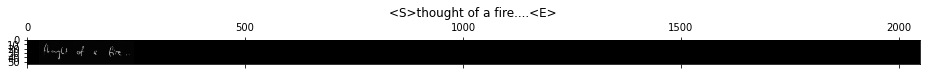

<Figure size 1440x1440 with 0 Axes>

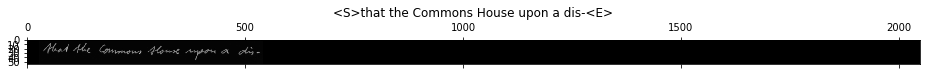

<Figure size 1440x1440 with 0 Axes>

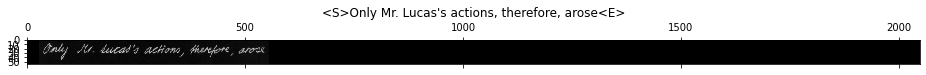

<Figure size 1440x1440 with 0 Axes>

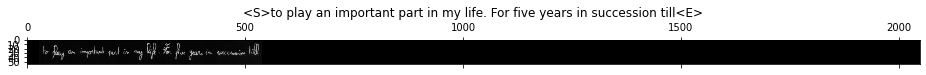

<Figure size 1440x1440 with 0 Axes>

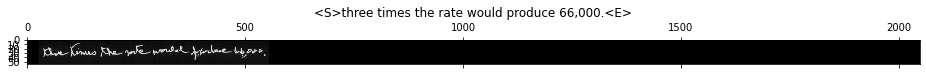

<Figure size 1440x1440 with 0 Axes>

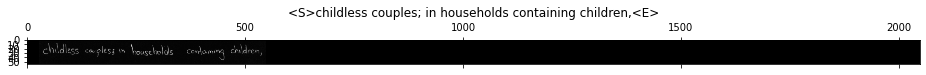

In [20]:
X, Y = next(iter(dataset.train_dataloader()))

for i in range(10):
    plt.figure(figsize=(20, 20))
    x, y = X[i], Y[i]
    sentence = convert_y_label_to_string(y)
    plt.matshow(x.squeeze(), cmap="gray", vmin=0, vmax=1)
    plt.title(sentence)